In [176]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

**Выбранный датасет - продажа игр**

In [177]:
sns.set_theme()
plt.rcParams["figure.figsize"] = (8,8)

In [178]:
df_n1 = pd.read_csv('vgsales.csv',sep =',')


In [179]:
df.head(30)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


**Получим информацию о типах данных в таблице**

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Приведем YEAR в типу данных datetime

In [181]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

In [182]:
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989-01-01,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006-01-01,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006-01-01,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


**Проверим есть ли пропущенные значения. Их нет**

In [184]:
a = pd.isna(df).any()

if True in a:
    print('True')
else:
    print('False')

False


**Удалим дубликаты, если они есть**

In [185]:
df.drop_duplicates()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**Рассчитаем статистические показатели для числовых переменных**

In [186]:
df.mean(axis = 0, numeric_only = True)

Rank            8300.605254
NA_Sales           0.264667
EU_Sales           0.146652
JP_Sales           0.077782
Other_Sales        0.048063
Global_Sales       0.537441
dtype: float64

Наибольшее число продаж в среднем по всем играм наблюдается в Северной Америке, потом в Европе и в Японии. 

In [187]:
df.median(axis = 0, numeric_only = True)

Rank            8300.50
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
dtype: float64

Медиана - значение ровно посередине упорядоченного множества. Таким образом, если сложить наибольшие и наименьшие продажи для каждого региона и поделить на 2, то лидировать все равно будет Северная Америка. Видимо, максимальное число продаж там сильно первышает число продаж в Европе и Японии.  

In [188]:
df.std(numeric_only = True)

Rank            4791.853933
NA_Sales           0.816683
EU_Sales           0.505351
JP_Sales           0.309291
Other_Sales        0.188588
Global_Sales       1.555028
dtype: float64

Величины стандартного отклонения показывают насколько значения в выборке отклоняются от среднего значения, что говорит о неравномерности продаж. Величина отклонения в Северной Америке наибольшая, можно сделать вывод, что некоторые игры в этом регионе продаются в разы лучше остальных. Если посмотреть на показатель Глобальных продаж, то видно, что есть игры, которые значительно лидируют в продажах по сранению с другими играми. 

**Рассмотрим игры каких жанров выпускают чаще всего**. Это игры жанра Action. Второе место занимают игры в жанре Sports.
Самыми редко выпускаемыми являются игры в жанре Pazzle.

<AxesSubplot:>

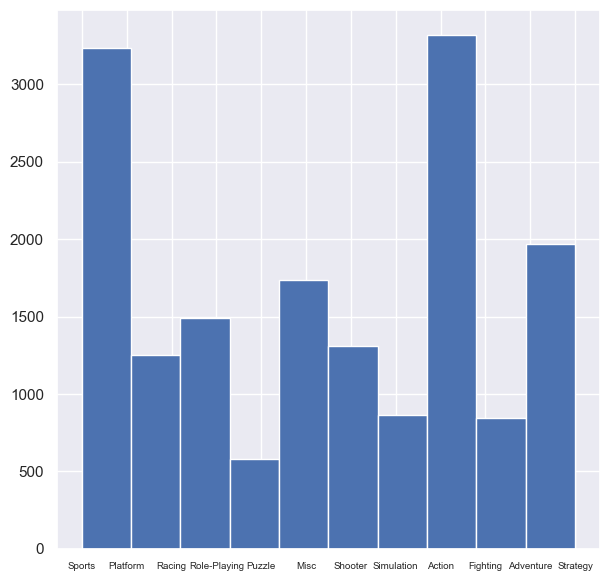

In [189]:
df['Genre'].hist(figsize = [7,7], xlabelsize = 7)

Чаще всего игры выпускают на платформах x360 и PS3

<AxesSubplot:>

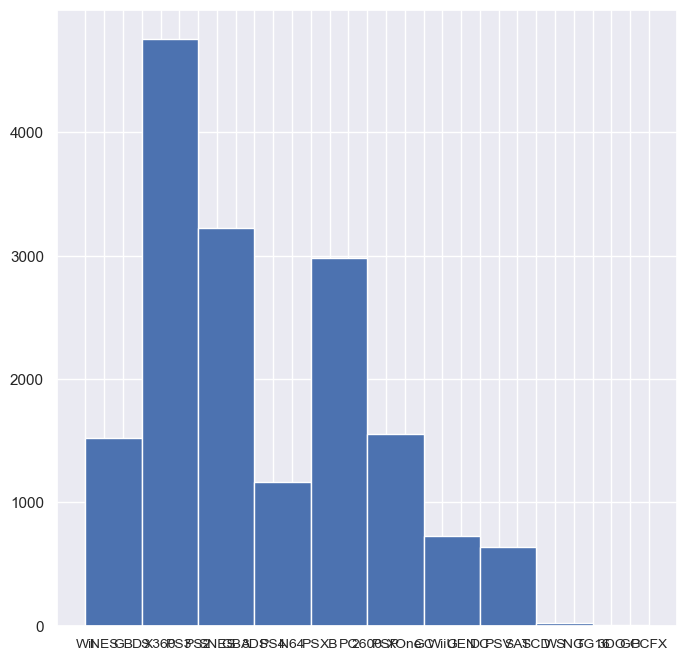

In [190]:
df['Platform'].hist(xlabelsize = 10)

## Рассмотрим зависимости между жанром игры и продажами

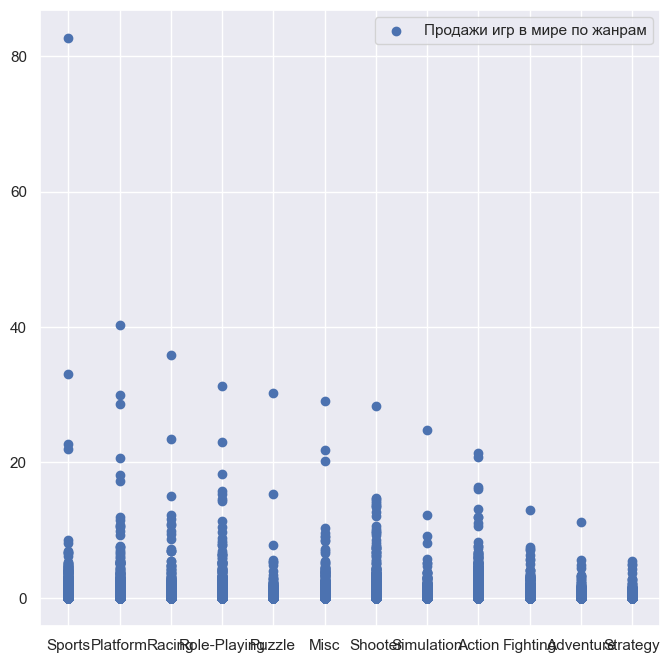

In [191]:
plt.scatter(df['Genre'], df['Global_Sales'], label = 'Продажи игр в мире по жанрам')
plt.legend()

Видно, что одна точка в категории Sports сильно выбивается. Это самая популярная игра, которая дает ложное представление о выборке.Уберем ее.

In [192]:
df.drop([0], inplace = True)

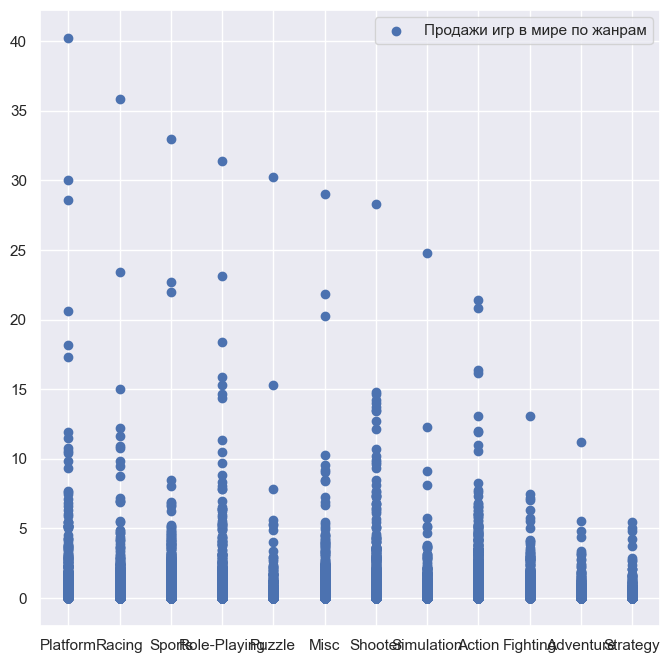

In [193]:
plt.scatter(df['Genre'], df['Global_Sales'], label = 'Продажи игр в мире по жанрам')
plt.legend()

Создадим отдельную таблицу со средними продажами каждого жанра в каждом регионе

In [194]:
genre_means = pd.pivot_table(df, values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'],\
                             index = ['Genre'], \
                             aggfunc = {'NA_Sales':['mean'], 'EU_Sales':['mean'], 'JP_Sales':['mean'], 'Other_Sales':['mean'],'Global_Sales' :['mean']}).reset_index()
genre_means = genre_means[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
genre_means

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,,mean,mean,mean,mean,mean
0,Action,0.264726,0.158323,0.048236,0.056508,0.528100
1,Adventure,0.082271,0.049868,0.040490,0.013072,0.185879
2,Fighting,0.263667,0.119481,0.103007,0.043255,0.529375
3,Misc,0.235906,0.124198,0.061967,0.043312,0.465762
4,Platform,0.504571,0.227573,0.147596,0.058228,0.938341
5,Puzzle,0.212680,0.087251,0.098471,0.021564,0.420876
6,Racing,0.287766,0.190865,0.045388,0.061865,0.586101
7,Role-Playing,0.219946,0.126384,0.236767,0.040060,0.623233
8,Shooter,0.444733,0.239137,0.029221,0.078389,0.791885


Рассмотрим круговые диаграммы по созданном таблице, чтобы определить наиболее прибыльный жанр в каждом регионе

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\2733459348.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  genre_means.groupby(['Genre']).sum().plot(


<AxesSubplot:title={'center':'Продажи в среднем по каждому жанру в Северной Америке'}, ylabel='mean'>

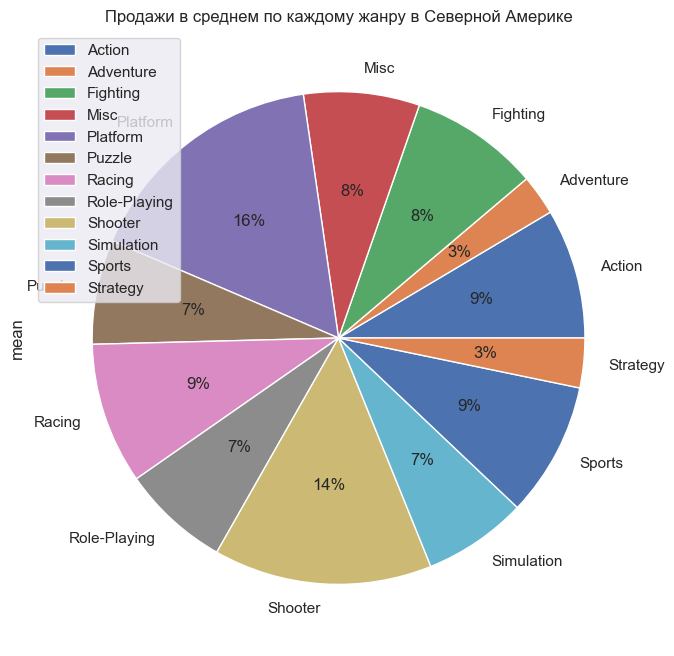

In [195]:
genre_means.groupby(['Genre']).sum().plot(
    kind='pie', y='NA_Sales', autopct='%1.0f%%', title = 'Продажи в среднем по каждому жанру в Северной Америке')

Судя по средним значениям, лучше всего в Северной Америке продаются игры в жанре Platform

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\1484991839.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  genre_means.groupby(['Genre']).sum().plot(


<AxesSubplot:title={'center':'Продажи в среднем по каждому жанру в Европе'}, ylabel='mean'>

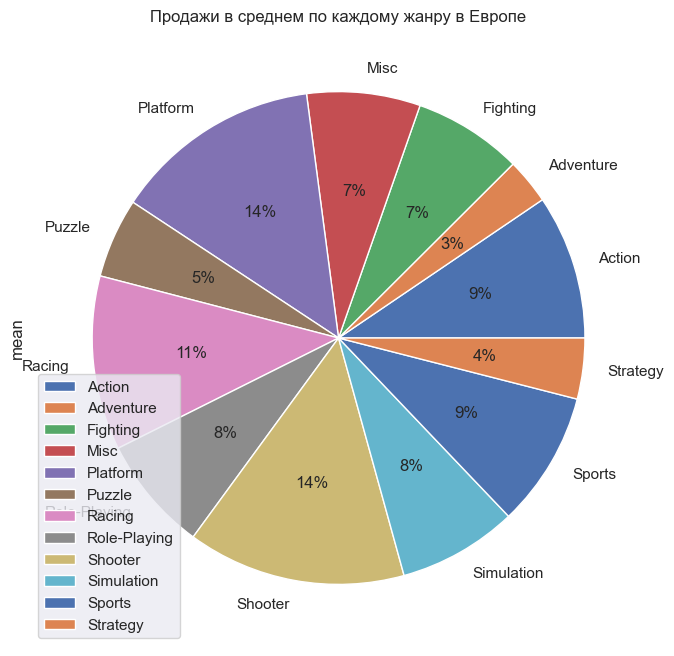

In [196]:
genre_means.groupby(['Genre']).sum().plot(
    kind='pie', y='EU_Sales', autopct='%1.0f%%', title = 'Продажи в среднем по каждому жанру в Европе')

Судя по средним значениям, лучше всего в Европе продаются игры в жанрах Shooter и Platform

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\1917852844.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  genre_means.groupby(['Genre']).sum().plot(


<AxesSubplot:title={'center':'Продажи в среднем по каждому жанру в Японии'}, ylabel='mean'>

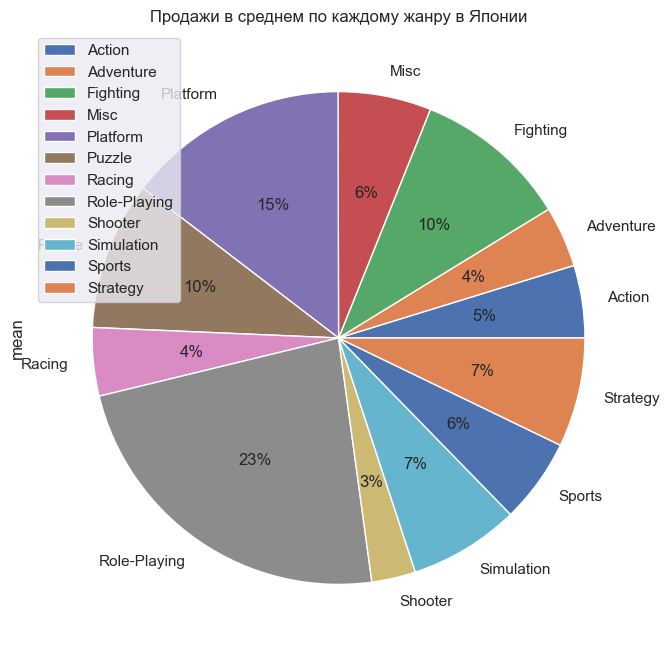

In [197]:
genre_means.groupby(['Genre']).sum().plot(
    kind='pie', y='JP_Sales', autopct='%1.0f%%', title = 'Продажи в среднем по каждому жанру в Японии')

Судя по средним значениям, лучше всего в Японии продаются игры в жанре Role-Playing

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\3504442588.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  genre_means.groupby(['Genre']).sum().plot(


<AxesSubplot:title={'center':'Продажи в среднем по каждому жанру в других регионах'}, ylabel='mean'>

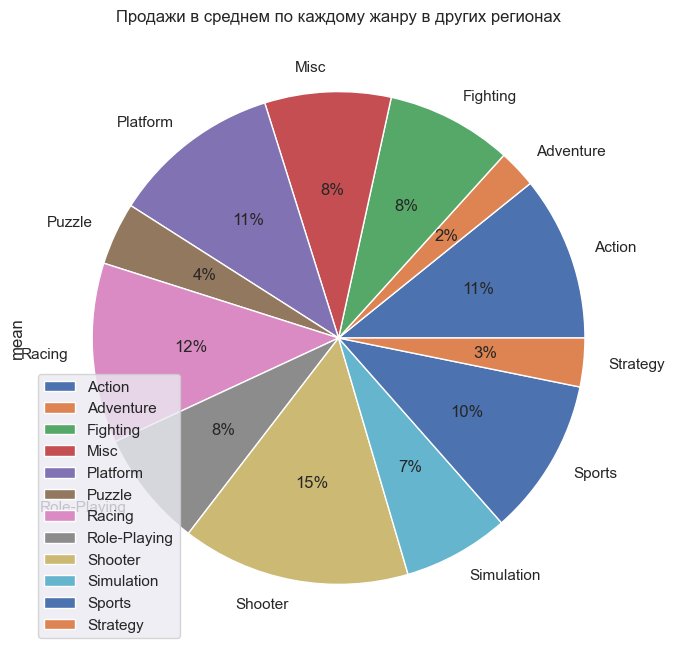

In [198]:
genre_means.groupby(['Genre']).sum().plot(
    kind='pie', y='Other_Sales', autopct='%1.0f%%', title = 'Продажи в среднем по каждому жанру в других регионах')

Судя по средним значениям, лучше всего в остальных странах продаются игры в жанре Shooter

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\621444144.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  genre_means.groupby(['Genre']).sum().plot(


<AxesSubplot:title={'center':'Продажи в среднем по каждому жанру в мире'}, ylabel='mean'>

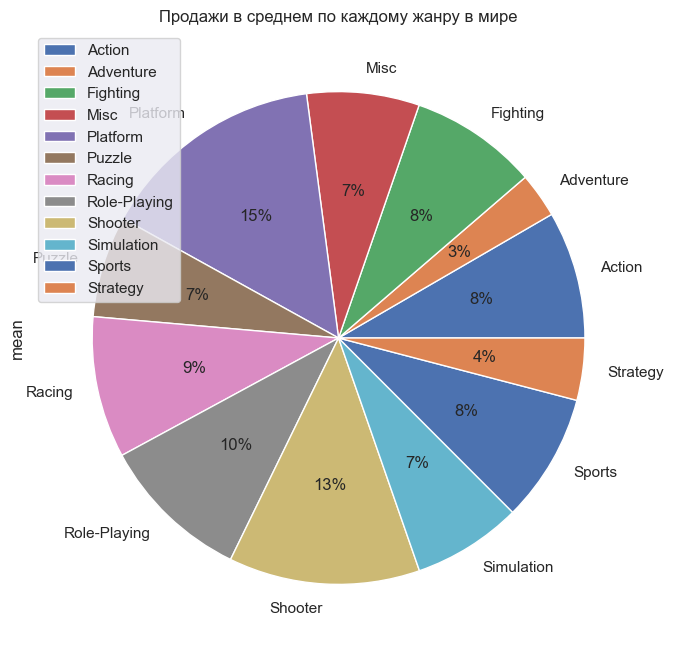

In [199]:
genre_means.groupby(['Genre']).sum().plot(
    kind='pie', y='Global_Sales', autopct='%1.0f%%', title = 'Продажи в среднем по каждому жанру в мире')

Судя по средним значениям, лучше всего в мире продаются игры в жанре **Platform**. Второе место - **Shooter**.

Игры в жанре Platform занимают лидирующие позиции по средним продажам и входят в топ-2 игровых жанров во всех регионах, а также в мире. Поэтому по средним показателям выгодно делать игры в данном жанре

Рассмотрим теперь суммарные продажи игр разных жанров в мире

In [200]:
genre_sum = pd.pivot_table(df, values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'],\
                             index = ['Genre'], \
                             aggfunc = {'NA_Sales':['sum'], 'EU_Sales':['sum'], 'JP_Sales':['sum'], 'Other_Sales':['sum'],'Global_Sales' :['sum']}).reset_index()
genre_sum = genre_sum[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
genre_sum

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,,sum,sum,sum,sum,sum
0,Action,877.83,525.00,159.95,187.38,1751.18
1,Adventure,105.80,64.13,52.07,16.81,239.04
2,Fighting,223.59,101.32,87.35,36.68,448.91
3,Misc,410.24,215.98,107.76,75.32,809.96
4,Platform,447.05,201.63,130.77,51.59,831.37
5,Puzzle,123.78,50.78,57.31,12.55,244.95
6,Racing,359.42,238.39,56.69,77.27,732.04
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
8,Shooter,582.60,313.27,38.28,102.69,1037.37


C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\666790616.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  genre_sum.groupby(['Genre']).sum().plot(


<AxesSubplot:title={'center':'Суммарные продажи по каждому жанру в мире'}, ylabel='sum'>

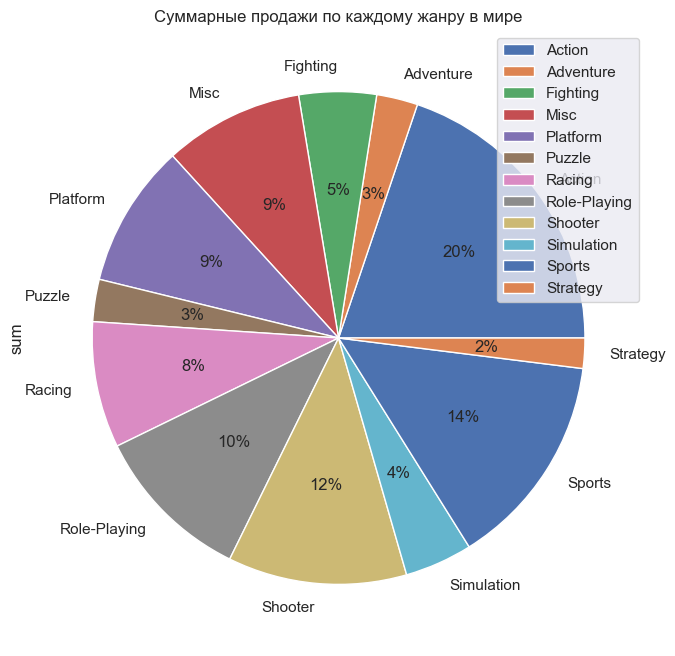

In [201]:
genre_sum.groupby(['Genre']).sum().plot(
    kind='pie', y='Global_Sales', autopct='%1.0f%%', title = 'Суммарные продажи по каждому жанру в мире')

По общему объему продаж лидируют игры в жанре **Action**. Затем **Sports** и **Shooter**. Как мы уже видели раньше, игры в этом жанре выпускают чаще всего. Рассмотрим топ игр в жанре Action.

## Франшизы

In [202]:
df[df['Genre'] == 'Action'].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004-01-01,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013-01-01,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002-01-01,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001-01-01,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,45,Grand Theft Auto V,PS4,2014-01-01,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009-01-01,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
51,52,Grand Theft Auto IV,X360,2008-01-01,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008-01-01,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
82,83,FIFA Soccer 13,PS3,2012-01-01,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24


Как видно из таблицы, в топе находятся игры серии GTA. Это полюбившаяся геймерам франшиза продается гораздо лучше других Action-игр. Разработчику, желающему начать выпускать свои игры, не стоит ориентироваться на данный показатель, так как это франшиза, а не одна игра.

In [203]:
df[df['Genre'] == 'Platform'].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006-01-01,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
18,19,Super Mario World,SNES,1990-01-01,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
21,22,Super Mario Land,GB,1989-01-01,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
22,23,Super Mario Bros. 3,NES,1988-01-01,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
46,47,Super Mario 64,N64,1996-01-01,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89
48,49,Super Mario Galaxy,Wii,2007-01-01,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
53,54,Super Mario 3D Land,3DS,2011-01-01,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
57,58,Super Mario All-Stars,SNES,1993-01-01,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55


Похожая ситуация и с играми в жанре Platform. Здесь лидируют игры серии Super Mario.

Рассмотрим ситуацию с франшизами. Выберем топ-3 игры в каждом жанре

In [204]:
topgames = dict.fromkeys(df['Genre'].drop_duplicates())
for e in df['Genre'].drop_duplicates():
    topgames[e] = df['Name'][df['Genre'] == e].head(3)

In [205]:
topgames

{'Platform': 1            Super Mario Bros.
 6        New Super Mario Bros.
 8    New Super Mario Bros. Wii
 Name: Name, dtype: object,
 'Racing': 2             Mario Kart Wii
 11             Mario Kart DS
 28    Gran Turismo 3: A-Spec
 Name: Name, dtype: object,
 'Sports': 3     Wii Sports Resort
 13              Wii Fit
 14         Wii Fit Plus
 Name: Name, dtype: object,
 'Role-Playing': 4          Pokemon Red/Pokemon Blue
 12      Pokemon Gold/Pokemon Silver
 20    Pokemon Diamond/Pokemon Pearl
 Name: Name, dtype: object,
 'Puzzle': 5                                          Tetris
 27    Brain Age 2: More Training in Minutes a Day
 89                                        Pac-Man
 Name: Name, dtype: object,
 'Misc': 7                                         Wii Play
 15                              Kinect Adventures!
 19    Brain Age: Train Your Brain in Minutes a Day
 Name: Name, dtype: object,
 'Shooter': 9                          Duck Hunt
 29    Call of Duty: Modern Warfare 

In [206]:
topgames_names = ['Wii', 'Super Mario', 'Mario Kart', 'Pokemon', 'Tetris','Kinect', 'Call of Duty', 'Animal Crossing', 'Grand Theft Auto', 'Super Smash Bros', 'Assassin\'s Creed', 'Warzone']

In [207]:
tpgames_count = []
for e in topgames_names:
    i=0
    for t in df['Name'].str.contains(e):
        if t == True:
            i+=1
    tpgames_count.append(i)
        

In [208]:
t = {k:v for k, v in zip(topgames_names, tpgames_count)}

In [209]:
t

{'Wii': 52,
 'Super Mario': 34,
 'Mario Kart': 9,
 'Pokemon': 35,
 'Tetris': 29,
 'Kinect': 13,
 'Call of Duty': 59,
 'Animal Crossing': 6,
 'Grand Theft Auto': 28,
 'Super Smash Bros': 5,
 "Assassin's Creed": 39,
 'Warzone': 2}

In [210]:
top_franchise = {k:v for k, v in zip(df['Genre'].drop_duplicates(), tpgames_count)}

Ниже представлено числ игр популярных франшиз в каждом жанре

In [211]:
top_franchise

{'Platform': 52,
 'Racing': 34,
 'Sports': 9,
 'Role-Playing': 35,
 'Puzzle': 29,
 'Misc': 13,
 'Shooter': 59,
 'Simulation': 6,
 'Action': 28,
 'Fighting': 5,
 'Adventure': 39,
 'Strategy': 2}

In [212]:
top_franchise_nm = {k:v for k, v in zip(df['Genre'].drop_duplicates(), topgames_names)}

In [213]:
top_franchise_nm

{'Platform': 'Wii',
 'Racing': 'Super Mario',
 'Sports': 'Mario Kart',
 'Role-Playing': 'Pokemon',
 'Puzzle': 'Tetris',
 'Misc': 'Kinect',
 'Shooter': 'Call of Duty',
 'Simulation': 'Animal Crossing',
 'Action': 'Grand Theft Auto',
 'Fighting': 'Super Smash Bros',
 'Adventure': "Assassin's Creed",
 'Strategy': 'Warzone'}

Удалим игры найденных франшиз и посмотрим что изменится.

In [214]:
without_fr = df[df["Name"].str.contains("Wii|Super Mario|Mario Kart|Pokemon|Tetris|Kinect|Call of Duty|Animal Crossing|Grand Theft Auto|Super Smash Bros|Assassin\'s Creed|Warzone")== False]
        

In [215]:
without_fr

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,11,Nintendogs,DS,2005-01-01,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005-01-01,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005-01-01,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
28,29,Gran Turismo 3: A-Spec,PS2,2001-01-01,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [216]:
without_fr_piv = pd.pivot_table(without_fr, values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'],\
                             index = ['Genre'], \
                             aggfunc = {'NA_Sales':['sum'], 'EU_Sales':['sum'], 'JP_Sales':['sum'], 'Other_Sales':['sum'],'Global_Sales' :['sum']}).reset_index()
without_fr_piv = without_fr_piv [['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]


C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\1933612783.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  without_fr_piv.groupby(['Genre']).sum().plot(


<AxesSubplot:title={'center':'Суммарные продажи по каждому жанру в мире(без серий)'}, ylabel='sum'>

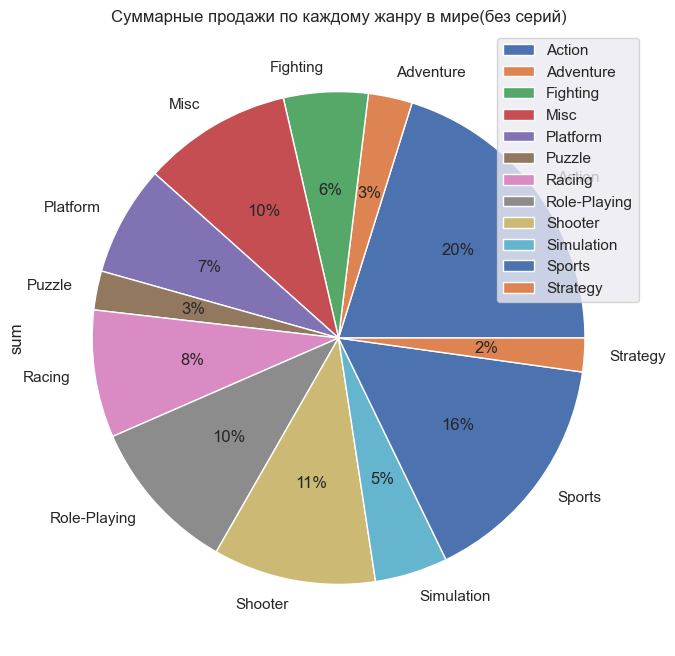

In [217]:
without_fr_piv.groupby(['Genre']).sum().plot(
    kind='pie', y='Global_Sales', autopct='%1.0f%%', title = 'Суммарные продажи по каждому жанру в мире(без серий)')

Видим, что ситуация не изменилась с исключением из списка серий популярных игр.

В каждом жанре есть серии популярных франшиз. В меньшей степени это заметно в играх жанров Fighting и Strategy. Однако эти игры не популярны в продаже. 

**Тенденции**

Теперь рассмотрим какие игры были популярны в последние 5 лет(из представленных), чтобы сделать вывод о том, что сейчас лучше выпускать

In [218]:
df['Year'].max()

Timestamp('2020-01-01 00:00:00')

In [219]:
lastfive = df[df['Year'] > '2014-01-01 00:00:00']

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\3343762789.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  lastfive_sum.groupby(['Genre']).sum().plot(


<AxesSubplot:title={'center':'Суммарные продажи по каждому жанру в мире за последние 5 лет'}, ylabel='sum'>

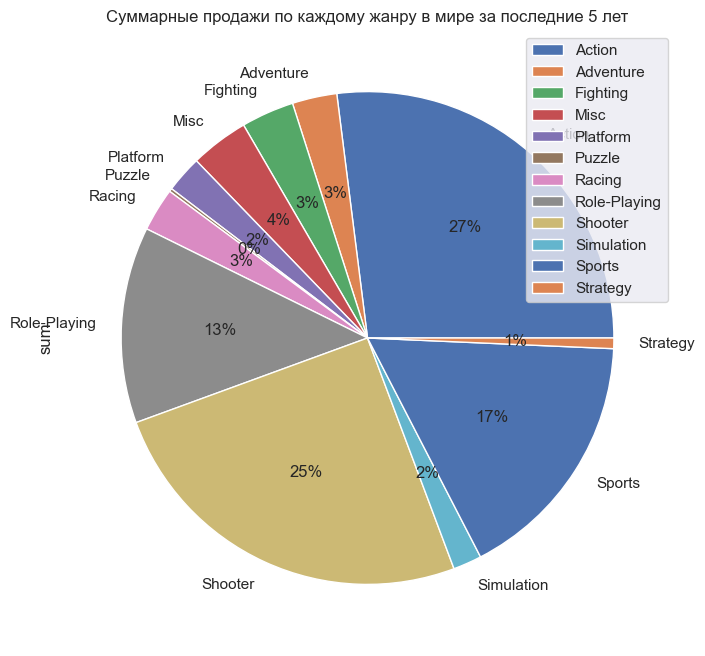

In [220]:
lastfive_sum = pd.pivot_table(lastfive, values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'],\
                             index = ['Genre'], \
                             aggfunc = {'NA_Sales':['sum'], 'EU_Sales':['sum'], 'JP_Sales':['sum'], 'Other_Sales':['sum'],'Global_Sales' :['sum']}).reset_index()
lastfive_sum = lastfive_sum[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]

lastfive_sum.groupby(['Genre']).sum().plot(
    kind='pie', y='Global_Sales', autopct='%1.0f%%', title = 'Суммарные продажи по каждому жанру в мире за последние 5 лет')

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\4268401495.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  lastfive_mean.groupby(['Genre']).sum().plot(


<AxesSubplot:title={'center':'Продажи в среднем по каждому жанру в мире за последние 5 лет'}, ylabel='mean'>

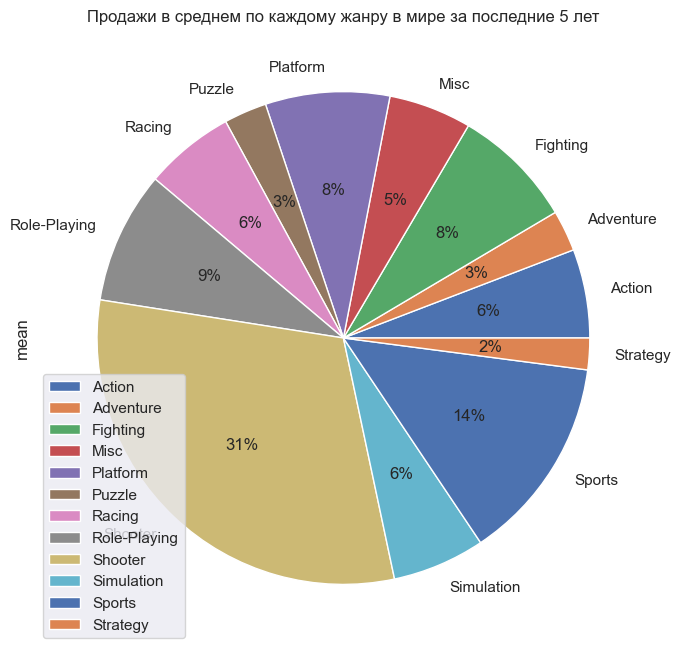

In [221]:
lastfive_mean = pd.pivot_table(lastfive, values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'],\
                             index = ['Genre'], \
                             aggfunc = {'NA_Sales':['mean'], 'EU_Sales':['mean'], 'JP_Sales':['mean'], 'Other_Sales':['mean'],'Global_Sales' :['mean']}).reset_index()
lastfive_mean = lastfive_mean[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]

lastfive_mean.groupby(['Genre']).sum().plot(
    kind='pie', y='Global_Sales', autopct='%1.0f%%', title = 'Продажи в среднем по каждому жанру в мире за последние 5 лет')

С 2015 по 2016 год больше всего денег собрали игры в жанрах **Action** и **Shooter**. Они наиболее популярны у пользователей. Кроме того, как уже было сказано выше, игры в жанре Action выпускают чаще всего. Стоит обратить внимание на эти два жанра, если разработчик хочет идти в ногу со временем.

## Рассмотрим популярность игровых платформ в мире.

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\621925113.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  platform_mean.groupby(['Platform']).sum().plot(


<AxesSubplot:title={'center':'Мировые продажи в среднем для каждой игровой платформы '}, ylabel='mean'>

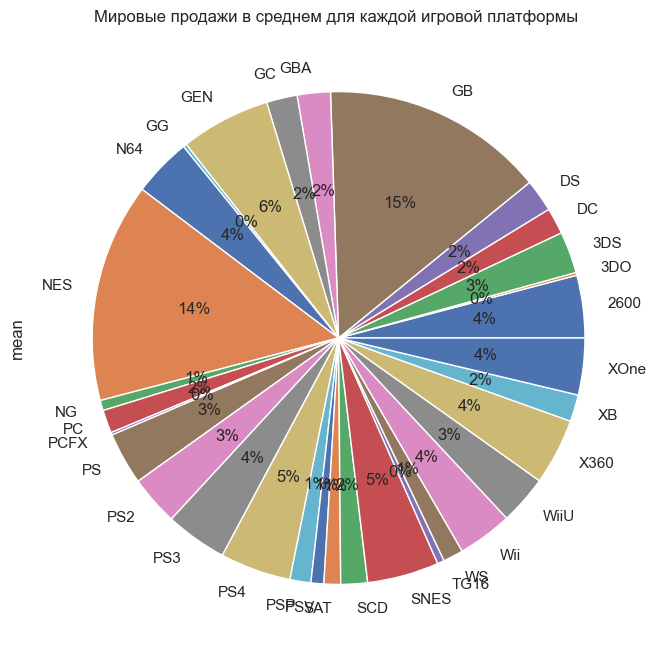

In [222]:
platform_mean = pd.pivot_table(df, values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'],\
                             index = ['Platform'], \
                             aggfunc = {'NA_Sales':['mean'], 'EU_Sales':['mean'], 'JP_Sales':['mean'], 'Other_Sales':['mean'],'Global_Sales' :['mean']}).reset_index()
platform_mean = platform_mean[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]

platform_mean.groupby(['Platform']).sum().plot(
    kind='pie', y='Global_Sales', autopct='%1.0f%%',legend = False, title = 'Мировые продажи в среднем для каждой игровой платформы ')

Видно, что в среднем по продажам лидируют платформы GB и NES.

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\1043957136.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  platform_sum.groupby(['Platform']).sum().plot(


<AxesSubplot:title={'center':'Мировые продажи в сумме для каждой игровой платформы '}, ylabel='sum'>

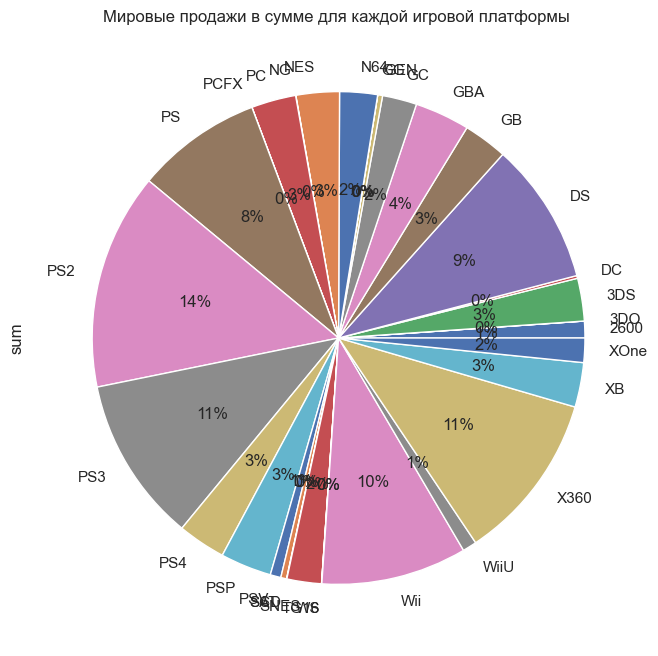

In [223]:
platform_sum = pd.pivot_table(df, values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'],\
                             index = ['Platform'], \
                             aggfunc = {'NA_Sales':['sum'], 'EU_Sales':['sum'], 'JP_Sales':['sum'], 'Other_Sales':['sum'],'Global_Sales' :['sum']}).reset_index()
platform_sum = platform_sum[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]

platform_sum.groupby(['Platform']).sum().plot(
    kind='pie', y='Global_Sales', autopct='%1.0f%%',legend = False, title = 'Мировые продажи в сумме для каждой игровой платформы ')

По общему объему продаж лидирует платформа PS2. 

## Корреляционный анализ

In [224]:
df.corr()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.430560,-0.416386,-0.267715,-0.350011,-0.462675
NA_Sales,-0.430560,1.000000,0.720281,0.451358,0.578208,0.929978
EU_Sales,-0.416386,0.720281,1.000000,0.442044,0.681259,0.881944
JP_Sales,-0.267715,0.451358,0.442044,1.000000,0.276308,0.631923
Other_Sales,-0.350011,0.578208,0.681259,0.276308,1.000000,0.708634
Global_Sales,-0.462675,0.929978,0.881944,0.631923,0.708634,1.000000


Text(0.5, 1.0, 'Продажи в других странах/Мировые продажи')

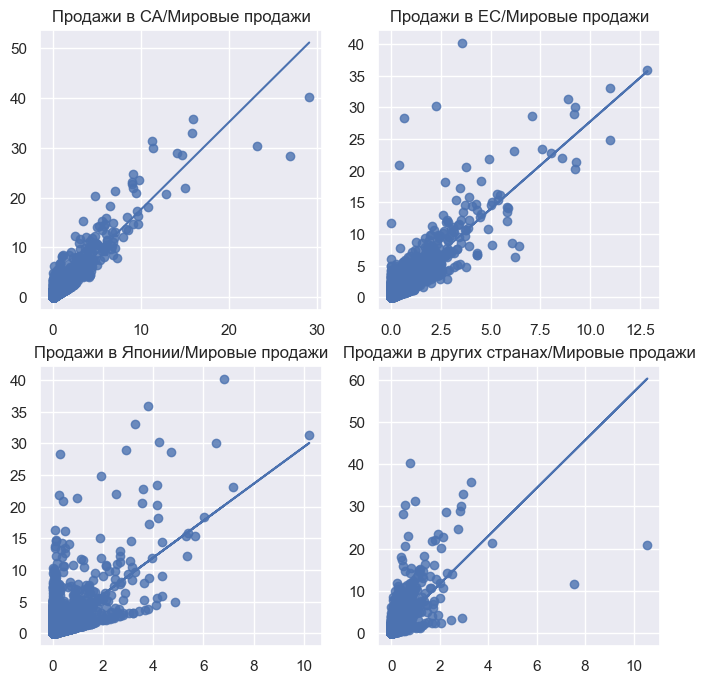

In [225]:
A = np.vstack([df['NA_Sales'], np.ones(len(df['NA_Sales']))]).T
m, c = np.linalg.lstsq(A, df['Global_Sales'], rcond=None)[0]
plt.subplot (2, 2, 1)
plt.scatter(df['NA_Sales'], df['Global_Sales'] , alpha=0.8)
plt.plot(df['NA_Sales'], m*df['NA_Sales']+c)
plt.title ("Продажи в СА/Мировые продажи")

A = np.vstack([df['EU_Sales'], np.ones(len(df['EU_Sales']))]).T
m, c = np.linalg.lstsq(A, df['Global_Sales'], rcond=None)[0]
plt.subplot (2, 2, 2)
plt.scatter(df['EU_Sales'], df['Global_Sales'] , alpha=0.8)
plt.plot(df['EU_Sales'], m*df['EU_Sales']+c)
plt.title ("Продажи в ЕС/Мировые продажи")

A = np.vstack([df['JP_Sales'], np.ones(len(df['JP_Sales']))]).T
m, c = np.linalg.lstsq(A, df['Global_Sales'], rcond=None)[0]
plt.subplot (2, 2, 3)
plt.scatter(df['JP_Sales'], df['Global_Sales'] , alpha=0.8)
plt.plot(df['JP_Sales'], m*df['JP_Sales']+c)
plt.title ("Продажи в Японии/Мировые продажи")

A = np.vstack([df['Other_Sales'], np.ones(len(df['Other_Sales']))]).T
m, c = np.linalg.lstsq(A, df['Global_Sales'], rcond=None)[0]
plt.subplot (2, 2, 4)
plt.scatter(df['Other_Sales'], df['Global_Sales'] , alpha=0.8)
plt.plot(df['Other_Sales'], m*df['Other_Sales']+c)
plt.title ("Продажи в других странах/Мировые продажи")

Судя по данной матрице, продажи во всех регионах обладают положительной корреляцией, то есть напрямую влияют друг на друга. Наибольше корреляцией с показателем Global_Sales обладает показатель NA_Sales. Можно сделать вывод, что мировой рынок игр в большем степени сформирован продажами в Северной Америке.

Text(0.5, 1.0, 'Продажи в других странах')

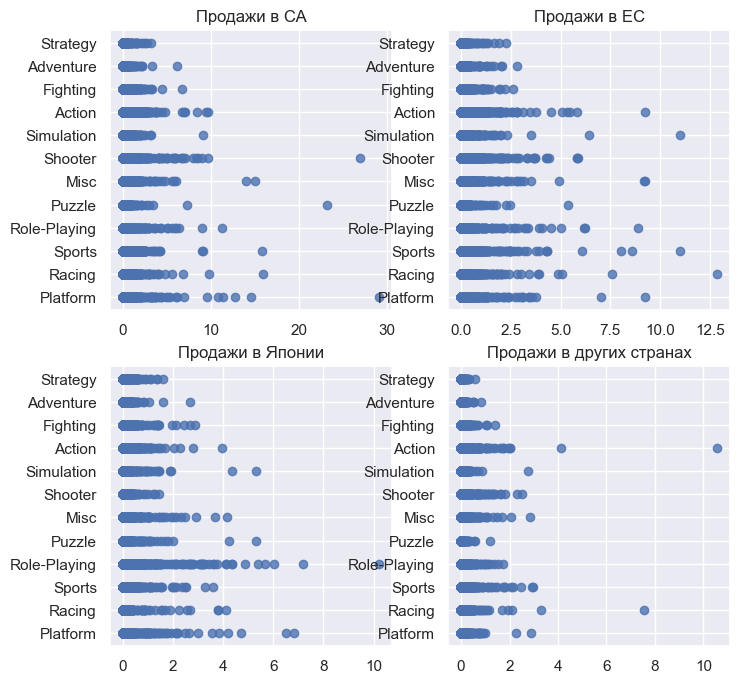

In [226]:
plt.subplot (2, 2, 1)
plt.scatter(df['NA_Sales'], df['Genre'] , alpha=0.8)
plt.title ("Продажи в СА")
plt.subplot (2, 2, 2)
plt.scatter(df['EU_Sales'], df['Genre'] , alpha=0.8)
plt.title ("Продажи в ЕС")
plt.subplot (2, 2, 3)
plt.scatter(df['JP_Sales'], df['Genre'] , alpha=0.8)
plt.title ("Продажи в Японии")
plt.subplot (2, 2, 4)
plt.scatter(df['Other_Sales'], df['Genre'] , alpha=0.8)
plt.title ("Продажи в других странах")

**Рассмотрим корреляции  между мировыми сборами  каждый жанр игры на каждой платформе**

In [227]:
k = []
for m in df['Platform'].drop_duplicates():
    p = []
    for e in df['Genre'].drop_duplicates():
        f = df[(df['Platform'] == m) & (df['Genre'] == e)]['Global_Sales']
        p.append(f.sum())
    k.append(p)



In [228]:
d = pd.DataFrame(k, index = df['Platform'].drop_duplicates(), columns = df['Genre'].drop_duplicates() )

In [229]:
d

Genre,Platform,Racing,Sports,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
Platform,,,,,,,,,,,,
NES,95.78,9.78,26.85,18.78,21.00,3.59,35.62,0.00,28.75,6.54,4.38,0.00
Wii,90.74,61.28,209.32,14.06,15.67,221.06,28.77,36.97,118.58,23.86,18.43,5.23
GB,54.91,4.55,9.05,88.24,47.47,13.35,1.20,3.55,7.92,0.00,17.16,8.05
DS,77.45,38.64,31.83,126.85,84.29,137.76,8.20,132.03,115.56,7.20,47.29,15.39
X360,11.39,65.99,139.12,71.98,0.85,91.96,278.55,14.45,242.67,37.64,15.23,10.13
PS3,30.33,73.95,135.56,75.30,0.60,47.85,196.04,10.79,307.88,51.70,22.90,4.94
PS2,72.51,156.28,273.41,93.50,5.90,101.14,108.57,42.66,272.76,92.60,21.16,15.15
SNES,65.65,13.49,17.87,36.43,6.38,5.02,6.07,5.63,10.08,26.95,1.50,4.98
GBA,78.30,18.80,16.41,64.21,12.92,36.25,3.60,5.91,55.76,4.21,14.68,7.45


<AxesSubplot:xlabel='Genre', ylabel='Platform'>

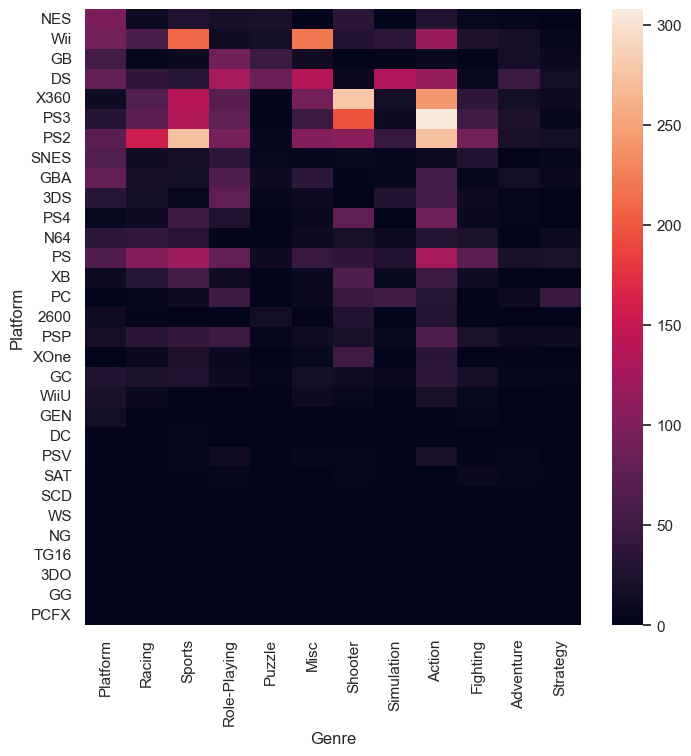

In [230]:
sns.heatmap(d)

Выбор платформы не имеет особого значения для игр в жанрах Adventure, Strategy, Fighting, Puzzle. Для игр жанров Action, Shooter, определенных нами как самые перспективные, выбор платформы имеет значение. Игры на платформах серии PS и X360 продаются лучше остальных. 

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\982725336.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sns.heatmap(genre_means.groupby(['Genre']).sum(), annot=True)


<AxesSubplot:xlabel='None-None', ylabel='Genre'>

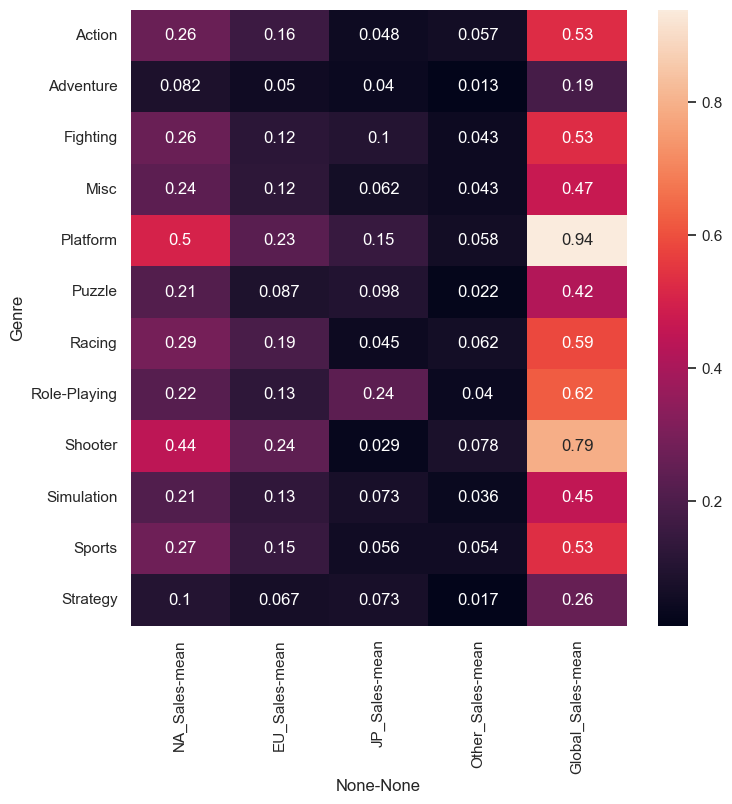

In [231]:
sns.heatmap(genre_means.groupby(['Genre']).sum(), annot=True)

C:\Users\Olga\AppData\Local\Temp\ipykernel_17944\1625729282.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sns.heatmap(genre_sum.groupby(['Genre']).sum(), annot=False)


<AxesSubplot:xlabel='None-None', ylabel='Genre'>

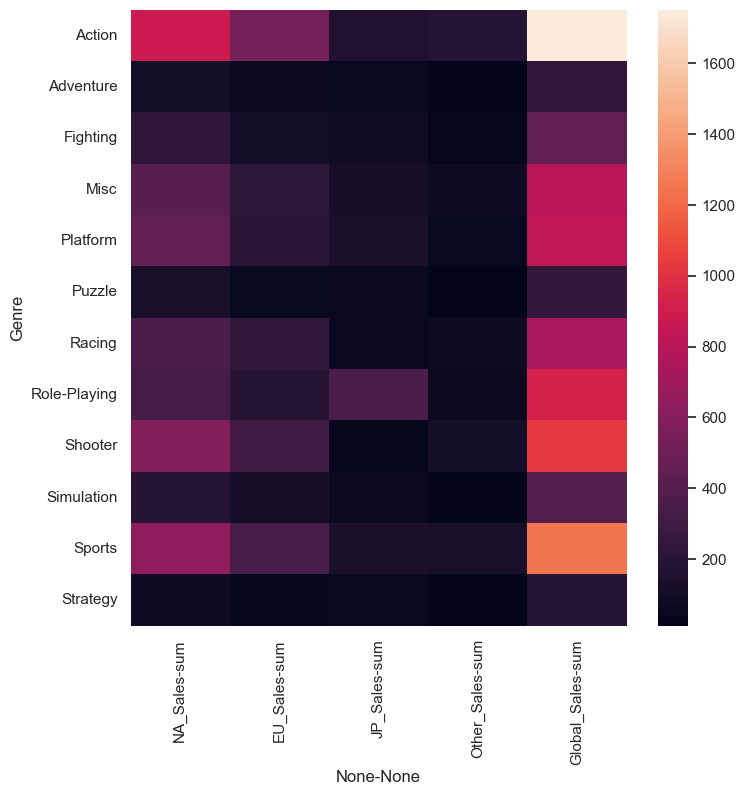

In [232]:
sns.heatmap(genre_sum.groupby(['Genre']).sum(), annot=False)

Самое большое влияние на мировой рынок оказывают игры в жанре Platform. На втором месте игры в жанре Shooter. Наименьшее - Adventure. На карте так же заметно, как сильно влияют продажи в Северной Америке на мировой рынок.

## Вывод

Начинающему разработчику стоит выбрать игру в жанре **Shooter**. Этот жанр был популярен среди пользователей в последние пять лет. Кроме того, по общему и среднему объему мировых продаж этот жанр входит в топ-3. Он также очень популярен в Северной Америке - регионе, который в большей степени формирует мировой рынок видеоигр. Кроме того, если не включать в исследование известные серии игр, то жанр Shooter также остается одним из самых продаваемых.

Игры жанра Shooter лучше всего продаются на платформах PS2, PS3, X360. Как было доказано, платформа PS2 занимает первое место среди игровых платформ по общим сборам продаж. Поэтому для создания игры стоит рассмотреть эту платформу. Хотя на момент 2024 года она уже не актуальна. Вероятно, стоит задуматься о последней модели PS.